<a href="https://colab.research.google.com/github/PollyaneRF/PollyaneRF/blob/main/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 08

#1) importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# 2) Importando DF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features = pd.read_csv('/content/drive/MyDrive/DEX03/DAY 08/features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores = pd.read_csv('/content/drive/MyDrive/DEX03/DAY 08/stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DEX03/DAY 08/train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


#3) Tratamento de dados

In [ ]:
#tratamento dos valores nulos dos markdown1-5
values = {"MarkDown1": 0, "MarkDown2": 0, "MarkDown3": 0, "MarkDown4": 0, "MarkDown5": 0}
features.fillna(value=values, inplace=True)

In [ ]:
#junção tabelas features e stores
df1 = features.merge(stores, how='inner')
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


Preenchendo os valores nulos com as médias por loja

In [ ]:
df2 = df1.groupby("Store").transform(lambda x: x.fillna(x.mean())) 

In [ ]:
df1[['CPI', 'Unemployment']] = df2[['CPI', 'Unemployment']]

In [ ]:
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False,A,151315
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000,True,A,151315
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000,False,A,151315
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000,False,A,151315
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,187.298763,8.640467,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,187.298763,8.640467,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,187.298763,8.640467,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,187.298763,8.640467,False,B,118221


In [ ]:
#Junção da tabela Train com DF1

df_joined = train.merge(df1)
df_joined

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


#4) EDA

In [ ]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
df_joined.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
def scatterplots(df, columns, target, hue=None):
    n = len(columns)
    kk = int(n / 3)
    r = 0
    j = 0
    if n % 3 > 0:
        r = 1

    fig, ax = plt.subplots(nrows=kk + r, ncols=3, constrained_layout=True, figsize=(20, 20))

    for i, col in enumerate(columns):
        k = int(i / 3)
        j = i % 3
        sns.scatterplot(x=col, data=df, y=target, hue=hue, ax=ax[k, j])
        for label in ax[k, j].get_xticklabels():
            label.set_rotation(45)
    # removing unused axes
    for i in range(j + 1, 3):
        fig.delaxes(ax[kk + r - 1, i])

In [ ]:
target = "Weekly_Sales"

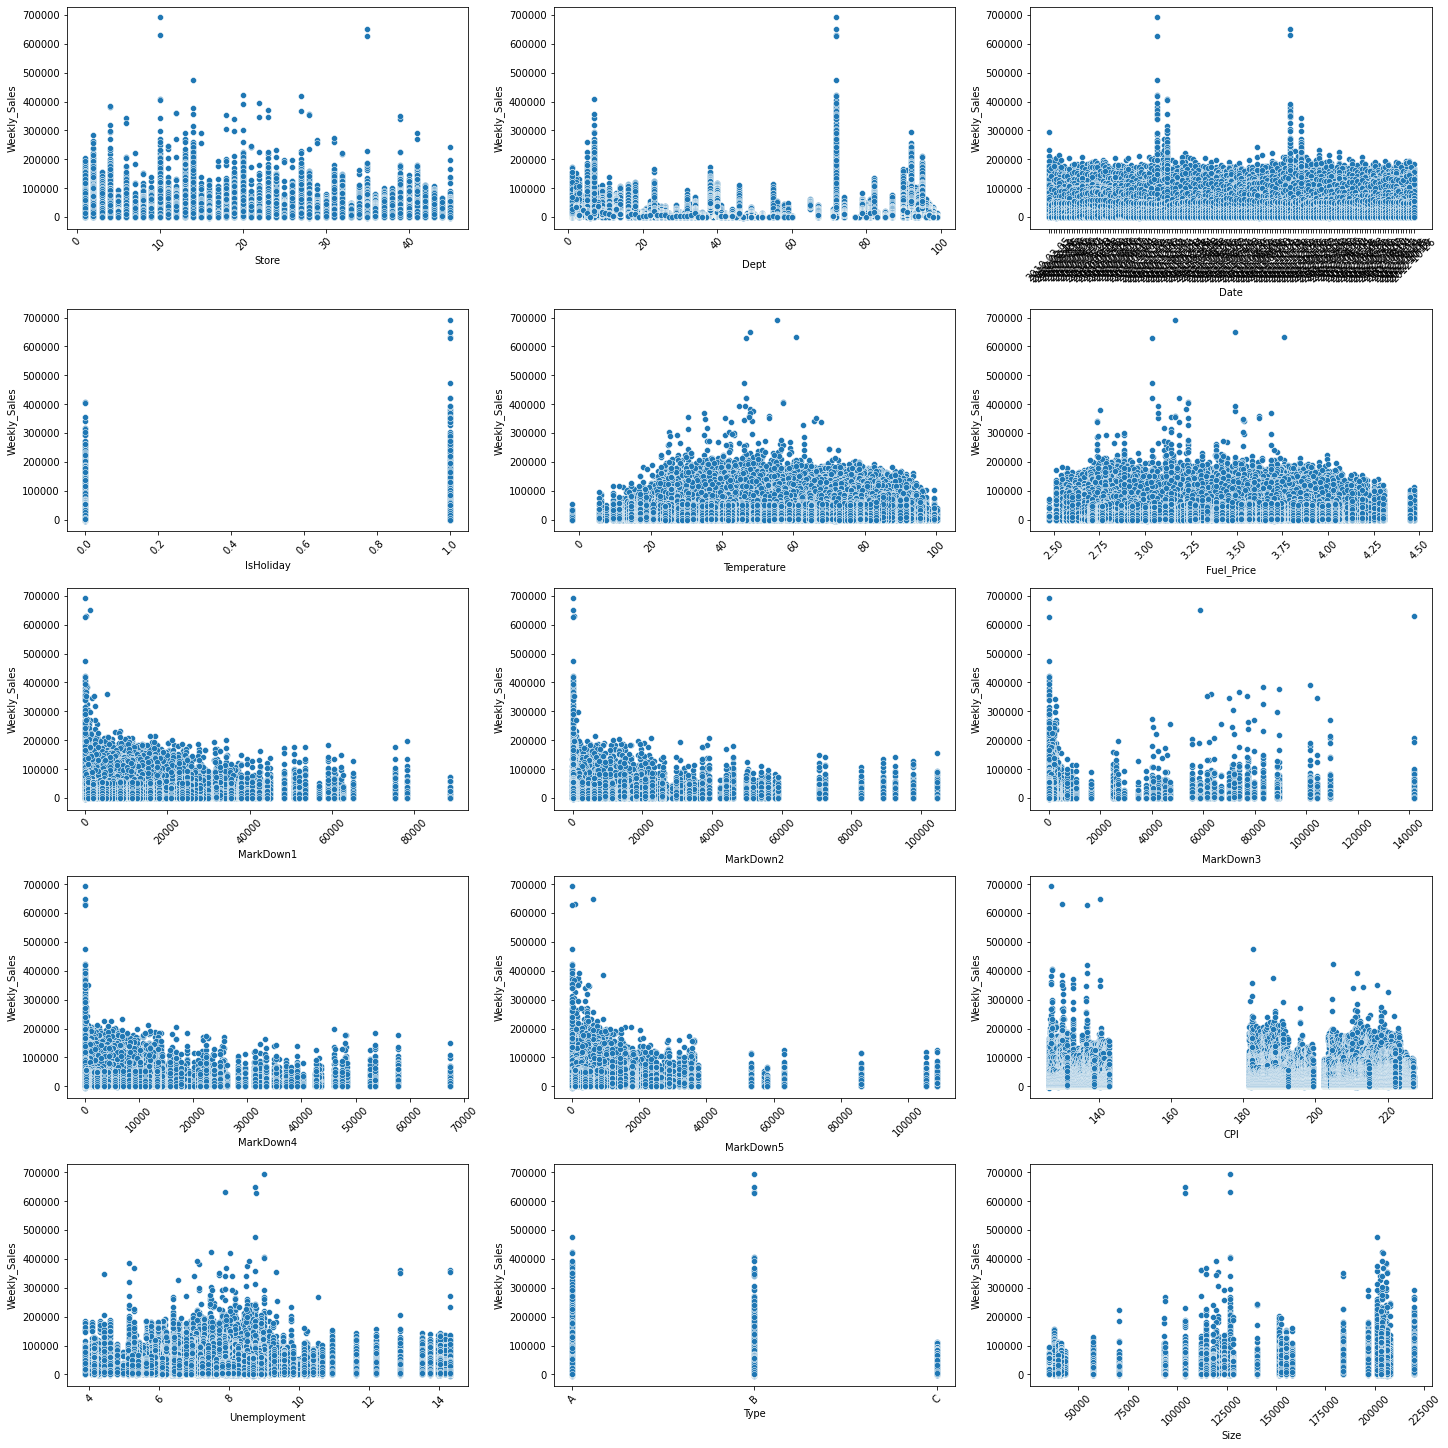

In [ ]:
scatterplots(df_joined, [col for col in df_joined.columns if col != target], target, hue=None)

In [ ]:
#convertendo Date para datetime
df_joined['Date'] = pd.to_datetime(df_joined['Date'])

Trocando variável booleana para 0 e 1

In [ ]:
df_joined['IsHoliday'] = df_joined['IsHoliday'].map({True:1, False:0})

Criando colunas de semana e ano

In [ ]:
df_joined['semana'] = df_joined['Date'].dt.week

In [ ]:
df_joined['ano'] = df_joined['Date'].dt.year

Tratando coluna Type com get dummies

In [ ]:
df_encoded = pd.get_dummies(df_joined, columns=['Type'], drop_first=True)
df_encoded.drop('Date', axis=1, inplace=True)

DF final

In [ ]:
df_encoded

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,semana,ano,Type_B,Type_C
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2010,0,0
1,1,2,50605.27,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2010,0,0
2,1,3,13740.12,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2010,0,0
3,1,4,39954.04,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2010,0,0
4,1,5,32229.38,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,2012,1,0
421566,45,94,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,2012,1,0
421567,45,95,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,2012,1,0
421568,45,97,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,2012,1,0


#5) Análise Micro

Pegando uma amostra de 10.000 linhas no DF

In [ ]:
df_sample = df_encoded.sample(n=10_000, random_state=1)
df_sample

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,semana,ano,Type_B,Type_C
367951,39,31,2500.16,1,47.60,3.129,5363.52,53918.62,193.95,383.85,8337.70,218.230236,7.716,184109,52,2011,0,0
224280,23,1,47129.06,0,27.01,3.703,8924.48,10140.32,1.88,6699.65,2236.81,137.258310,4.261,114533,7,2012,1,0
162564,17,60,484.00,0,70.60,3.563,0.00,0.00,0.00,0.00,0.00,129.112500,6.745,93188,27,2011,1,0
56720,6,4,32059.30,0,63.71,3.787,4928.84,57.72,10.95,664.80,3968.26,222.893083,6.132,202505,12,2012,0,0
367745,39,36,1913.96,0,49.36,3.158,4462.95,0.00,292.36,1354.79,22649.70,217.664588,7.716,184109,49,2011,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128453,14,16,18217.36,0,45.80,2.818,0.00,0.00,0.00,0.00,0.00,182.162844,8.992,200898,10,2010,0,0
148952,16,32,3168.22,0,41.26,2.788,0.00,0.00,0.00,0.00,0.00,189.490412,6.842,57197,19,2010,1,0
398710,43,81,20510.36,0,72.14,2.854,0.00,0.00,0.00,0.00,0.00,202.370509,9.593,41062,19,2010,0,1
389614,41,81,22473.31,0,65.11,3.741,10245.25,527.40,78.07,749.73,5117.87,197.655186,6.547,196321,23,2012,0,0


Separando o DF de amostra em X (sem a coluna `Weekly_Sales`) e y (só a coluna `Weekly_Sales`)

In [ ]:
X = df_sample.drop('Weekly_Sales', axis=1)
y = df_sample.Weekly_Sales

#6) Separação Treino e Teste

Separando em dados de treino e teste na proposcção de 33% para o teste e o restante para treino

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#7) Treinamento Padrão de Modelos

##a. Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred1 = reg.predict(X_test)

In [ ]:
print(f'R² score: {r2_score(y_test, y_pred1)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred1)}')
print(f'MSE: {mean_squared_error(y_test, y_pred1, squared=True)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred1, squared=False)}')

R² score: 0.08590963965986154
MAE: 14560.720233337997
MSE: 447680424.06152904
RMSE: 21158.45986979036


> Resultados regressão linear:<p>
R² score: 0.08590963965986154<p>
MAE: 14560.720233337997<p>
MSE: 447680424.06152904<p>
RMSE: 21158.45986979036

##b. SGDRegressor

In [ ]:
sgd = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))

sgd.fit(X_train, y_train)

y_pred2 = sgd.predict(X_test)

In [ ]:
print(f'R² score: {r2_score(y_test, y_pred2)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE: {mean_squared_error(y_test, y_pred2, squared=True)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred2, squared=False)}')

R² score: 0.08597974177251244
MAE: 14569.362486105769
MSE: 447646091.1937068
RMSE: 21157.648527038793


> Resultados SGDRegressor:<p>
R² score: 0.08120592058550735<p>
MAE: 14608.909217924625<p>
MSE: 449984094.5094809<p>
RMSE: 21212.828536276837

##c. GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

y_pred3 = gbr.predict(X_test)

In [ ]:
print(f'R² score: {r2_score(y_test, y_pred3)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred3)}')
print(f'MSE: {mean_squared_error(y_test, y_pred3, squared=True)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred3, squared=False)}')

R² score: 0.7260092902489272
MAE: 6969.89410593575
MSE: 134188349.91831326
RMSE: 11583.969523367768


> Resultados GradientBoostingRegressor:<p>
R² score: 0.7260092902489272<p>
MAE: 6969.89410593575<p>
MSE: 134188349.91831326<p>
RMSE: 11583.969523367768

##d. ExtraTreesRegressor

In [ ]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0)
etr.fit(X_train, y_train)

y_pred4 = etr.predict(X_test)

In [ ]:
print(f'R² score: {r2_score(y_test, y_pred4)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred4)}')
print(f'MSE: {mean_squared_error(y_test, y_pred4, squared=True)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred4, squared=False)}')

R² score: 0.8138524909412108
MAE: 4779.654126060605
MSE: 91166693.58861497
RMSE: 9548.12513473797


> Resultados ExtraTreesRegressor:<p>
R² score: 0.8138524909412108<p>
MAE: 4779.654126060605<p>
MSE: 91166693.58861497<p>
RMSE: 9548.12513473797

##e. RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)

y_pred5 = rfr.predict(X_test)

In [ ]:
print(f'R² score: {r2_score(y_test, y_pred5)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred5)}')
print(f'MSE: {mean_squared_error(y_test, y_pred5, squared=True)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred5, squared=False)}')

R² score: 0.24380189600118463
MAE: 12781.936530745657
MSE: 370351884.84729564
RMSE: 19244.528699017173


> Resultados RandomForestRegressor:<p>
R² score: 0.24380189600118463<p>
MAE: 12781.936530745657<p>
MSE: 370351884.84729564<p>
RMSE: 19244.528699017173<p>

##f. HuberReg

In [ ]:
huber = HuberRegressor()
huber.fit(X_train, y_train)

y_pred6 = huber.predict(X_test)

In [ ]:
print(f'R² score: {r2_score(y_test, y_pred6)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred6)}')
print(f'MSE: {mean_squared_error(y_test, y_pred6, squared=True)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred6, squared=False)}')

R² score: -0.06478597652638962
MAE: 12971.443958400425
MSE: 521484371.99220276
RMSE: 22836.0323172


> Resultados HuberReg:<p>
R² score: -0.06478597652638962<p>
MAE: 12971.443958400425<p>
MSE: 521484371.99220276<p>
RMSE: 22836.0323172

Estamos escolhendo o modelo `ExtraTreesRegressor`, pois possui o menor MAE o que representa uma variação no valor previsto de `4779.65`, além de ter o melhor R², MSE e RMSE.

#8) Hiperparametrização

In [ ]:
parameters = {
            # 'criterion': ['squared_error', 'absolute_error'],
              'max_depth': [None, 10, 20], 
              'n_estimators':[100,200,400]
            }
ETR = ExtraTreesRegressor(random_state=0)
clf = GridSearchCV(ETR, parameters)
clf.fit(X_train, y_train)
y_pred_o = clf.predict(X_test)

In [ ]:
print(f'R² score: {r2_score(y_test, y_pred_o)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_o)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_o, squared=True)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred_o, squared=False)}')

R² score: 0.8138524909412108
MAE: 4779.654126060605
MSE: 91166693.58861497
RMSE: 9548.12513473797


In [ ]:
clf.best_params_

{'max_depth': None, 'n_estimators': 100}

os parâmetros Default estão melhores

In [ ]:
etr = ExtraTreesRegressor(criterion='absolute_error', n_estimators=100, random_state=0, n_jobs=-1)
etr.fit(X_train, y_train)

y_pred7 = etr.predict(X_test)

In [ ]:
print(f'R² score: {r2_score(y_test, y_pred7)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred7)}')
print(f'MSE: {mean_squared_error(y_test, y_pred7, squared=True)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred7, squared=False)}')

R² score: 0.8140804041083624
MAE: 4810.589540712122
MSE: 91055071.95059483
RMSE: 9542.278132112626


Mesmo alterando o parâmetro `Criterion` para 'absolute_error' não houve melhora no MAE do modelo.

#9) Análise Macro

In [ ]:
X = df_encoded.drop('Weekly_Sales', axis=1)
y = df_encoded.Weekly_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
etr = ExtraTreesRegressor(max_depth=None, n_estimators=100, random_state=0)
etr.fit(X_train, y_train)

y_pred_f = etr.predict(X_test)

In [ ]:
print(f'R² score: {r2_score(y_test, y_pred_f)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_f)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_f, squared=True)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred_f, squared=False)}')

R² score: 0.9630216773421167
MAE: 1576.3699215427082
MSE: 19632413.886598993
RMSE: 4430.847987304348


Ao passar todo dataset verificamos melhora nas métricas do modelo padrão do `ExtraTreesRegressor`